In [22]:
import xarray as xa
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
vir = cm.get_cmap(name = "viridis")

In [3]:
PATH = "./finito/"
fil = "DJF_Boreal_qv.csv"

In [4]:
#glob.glob(PATH+"JJA*.nc")
season, climate_zone, param = fil.split(".")[0].split("_")

In [5]:
season, climate_zone, param

('DJF', 'Boreal', 'qv')

In [6]:
df = pd.read_csv(PATH+fil)

In [7]:
df.head()

,a,b
0,62.783184,0.493235
1,62.195477,0.498283
2,61.998638,0.501165
3,62.217121,0.501797
4,62.631145,0.503138


In [8]:
LONGITUDE = np.arange(-15, 42+0.25, 0.25) #" Doesn't include the last one "
LATITUDE = {"Boreal": np.arange(57, 70+0.25, 0.25),
            "Temperate": np.arange(46,57, 0.25),
            "Mediterranean": np.arange(30, 46, 0.25)}

In [9]:
# Split into a and b and --> reshape

In [10]:
a = df["a"].values.reshape( (len(LONGITUDE), len(LATITUDE[climate_zone]))  )
a = np.rot90(a)

In [11]:
b = df["b"].values.reshape( (len(LONGITUDE), len(LATITUDE[climate_zone]))  )
b = np.rot90(b)

In [12]:
a.shape

(53, 229)

In [13]:
#a = np.flip(a, axis = 1)

Improvements calculate the overall vmin, vmax to get the same colorar on all iges 

Text(0.5, 1.0, 'Heatmap a in y = ax + b')

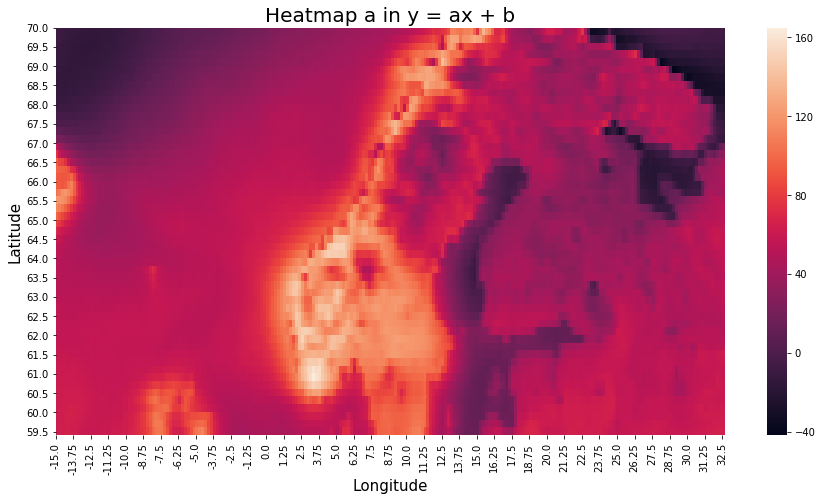

In [14]:
plt.figure(figsize = (15, 7.5))
ax = sns.heatmap(data = a, xticklabels = LONGITUDE[0:len(LONGITUDE)-1:5], yticklabels=LATITUDE[climate_zone][::-1][0:len(LATITUDE[climate_zone]):2]) #, ax = 'off'
ax.xaxis.set_major_locator(mticker.MaxNLocator(int(len(LONGITUDE))/5))
ax.yaxis.set_major_locator(mticker.MaxNLocator(int(len(LATITUDE[climate_zone]))/2))
plt.xlabel("Longitude", fontsize = 15)
plt.ylabel("Latitude", fontsize = 15)
plt.title("Heatmap a in y = ax + b", fontsize = 20)

# Subplot a og b

Text(0.5, 1.0, 'b in y = ax + b')

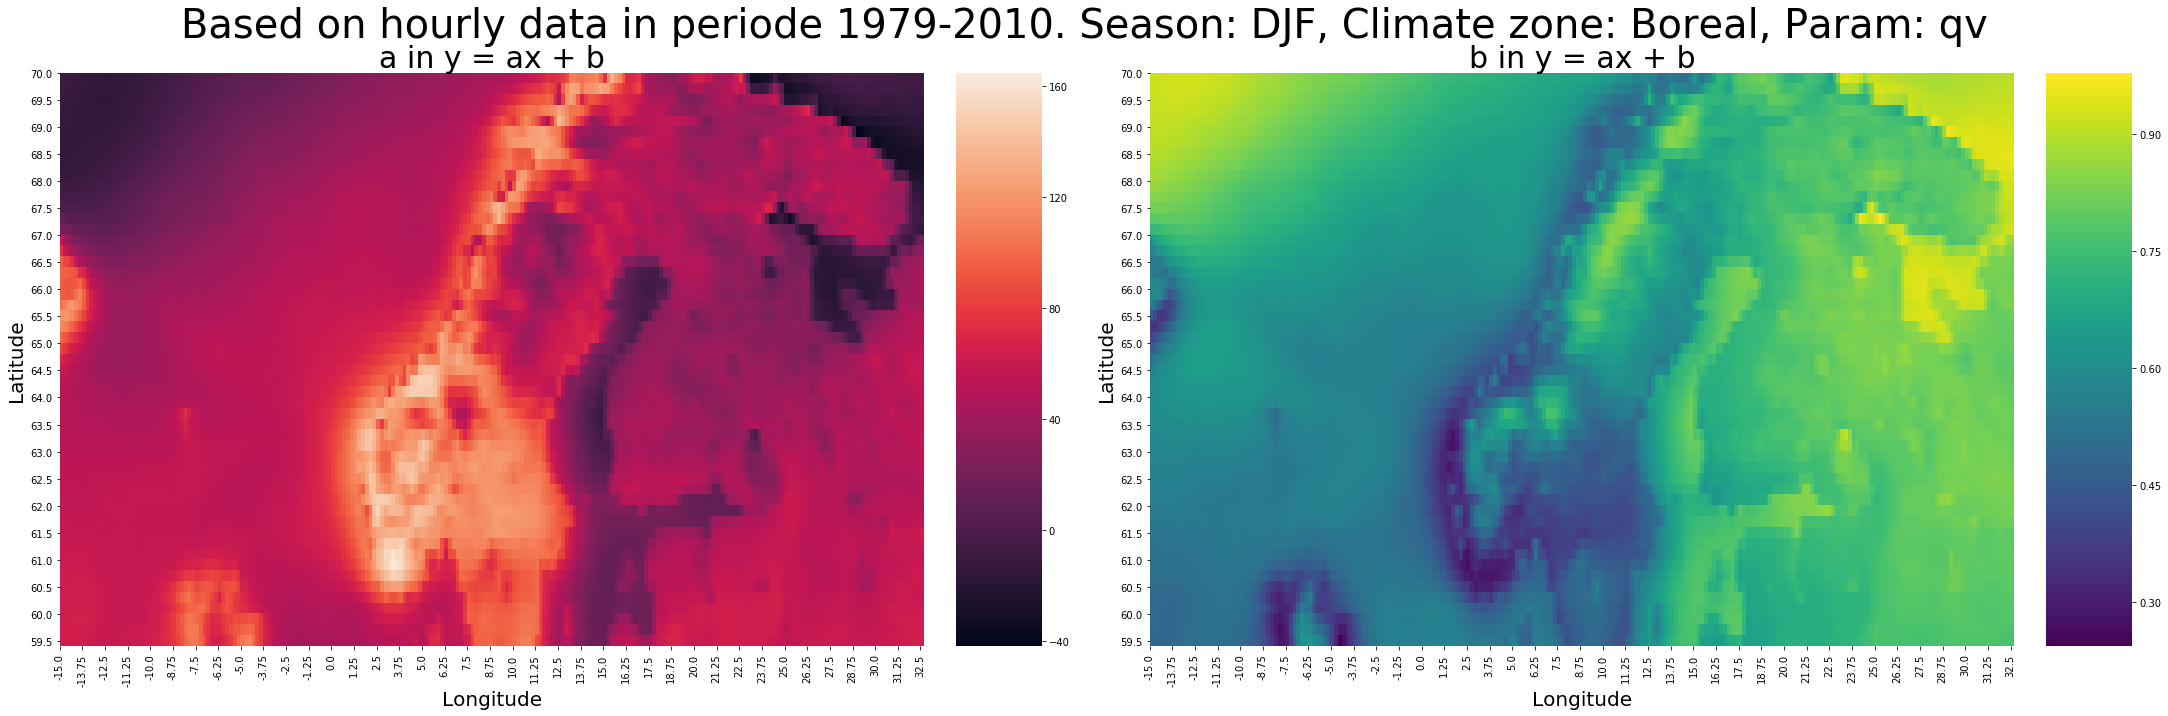

In [21]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex=False, sharey=False, figsize=(30, 10), squeeze = True,
                            constrained_layout=True)
f.suptitle("Based on hourly data in periode 1979-2010. Season: " + season + ", Climate zone: " + climate_zone + ", Param: " + param, fontsize = 40 ) 
# Plotting a
sns.heatmap(data = a, xticklabels = LONGITUDE[0:len(LONGITUDE)-1:5], yticklabels=LATITUDE[climate_zone][::-1][0:len(LATITUDE[climate_zone]):2], ax = ax1) #, ax = 'off'
ax1.xaxis.set_major_locator(mticker.MaxNLocator(int(len(LONGITUDE))/5))
ax1.yaxis.set_major_locator(mticker.MaxNLocator(int(len(LATITUDE[climate_zone]))/2))
ax1.set_xlabel("Longitude", fontsize = 20)
ax1.set_ylabel("Latitude", fontsize = 20)
ax1.set_title("a in y = ax + b", fontsize = 30)
#ax1.set_suptitle("Based on hourly data in periode 1979-2010", fontsize = 15)

# Plotting b
sns.heatmap(data = b, cmap = vir, xticklabels = LONGITUDE[0:len(LONGITUDE)-1:5], yticklabels=LATITUDE[climate_zone][::-1][0:len(LATITUDE[climate_zone]):2], ax = ax2) #, ax = 'off'
ax2.xaxis.set_major_locator(mticker.MaxNLocator(int(len(LONGITUDE))/5))
ax2.yaxis.set_major_locator(mticker.MaxNLocator(int(len(LATITUDE[climate_zone]))/2))
ax2.set_xlabel("Longitude", fontsize = 20)
ax2.set_ylabel("Latitude", fontsize = 20)
ax2.set_title("b in y = ax + b", fontsize = 30)

In [ ]:
f.savefig("./Results/Images_a_b/test.png")